In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
#from environment.single_family_home import SingleFamilyHome

In [4]:
#env = SingleFamilyHome("./environment/configs/config_hourly.json")
#env.reset()

({'carbon_intensity': array([40.17], dtype=float32),
  'timestep': array([0.], dtype=float32),
  'co2_emitted': array([0.], dtype=float32),
  'energy_storage_system_charge': array([0.], dtype=float32),
  'flexible_demand_schedule': array([6.6780605], dtype=float32),
  'tcl_indoor_temperature': array([20.], dtype=float32)},
 {})

# Static Components Figure

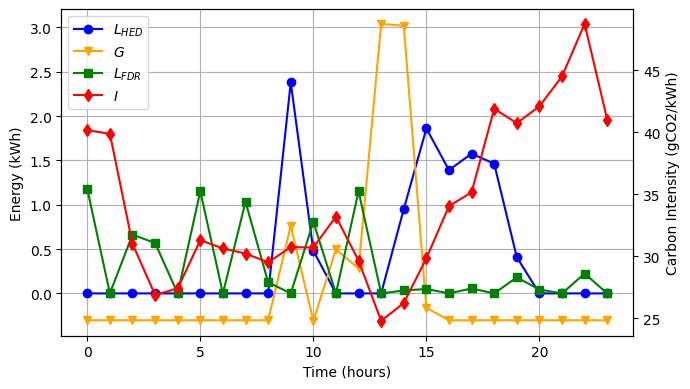

In [8]:

fig, ax = plt.subplots(figsize=(7, 4))
line1, = ax.plot(env.hed.episode.values[:24], label=r"$L_{HED}$", marker='o', color='blue')
line2, = ax.plot(env.rsa.episode.values[:24], label=r"$G$", marker='v', color='orange')
line3, = ax.plot(env.fdr.episode.values[:24], label=r"$L_{FDR}$", marker='s', color='green')
ax2 = ax.twinx()
line4, = ax2.plot(env.ees.episode.values[:24], label="$I$", marker='d', color='red')

# Create a list of lines and labels
lines = [line1, line2, line3, line4]
labels = [l.get_label() for l in lines]

# Create the legend box
ax.legend(lines, labels, loc='upper left')

# Set labels for the x and y axes
ax.set_xlabel('Time (hours)')
ax.set_ylabel('Energy (kWh)')
ax2.set_ylabel('Carbon Intensity (gCO2/kWh)')


# Add a grid to the plot
ax.grid(True)

# Adjust subplot parameters
plt.tight_layout()

# Show the plot
plt.show()

# Idle reward

In [1]:
import numpy as np
from analysis import load_data
data_dict = load_data("./logs/hourly")["idle"]

data_dict[0]["reward_info"].keys()

TypeError: list indices must be integers or slices, not str

In [4]:
data_dict[0].keys()

dict_keys(['next_observation', 'action', 'reward', 'reward_info', 'TimeLimit.truncated'])

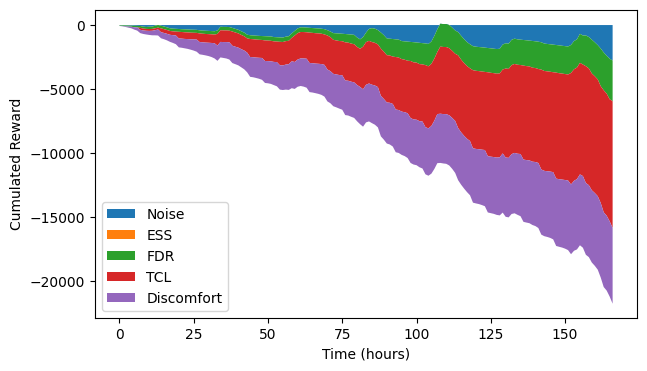

In [20]:
lists = [np.cumsum(val) for val in data_dict[0]["reward_info"].values()]

fig, ax = plt.subplots(figsize=(7, 4))
ax.stackplot(range(len(lists[0])), lists, labels=['Noise', 'ESS', 'FDR', 'TCL', 'Discomfort'])

ax.legend(loc='lower left')
ax.set_xlabel('Time (hours)')
ax.set_ylabel('Cumulated Reward')

plt.show()

# Initial training curve

In [3]:
from analysis import *

In [4]:
data_dict = load_data("./logs/hourly")

In [43]:
data_dict["ppo_sparse"][0][("next_observation")].keys()

dict_keys(['carbon_intensity', 'accumulated_reward', 'household_energy_demand', 'rooftop_solar_generation', 'energy_storage_system_charge', 'flexible_demand_schedule', 'tcl_indoor_temperature', 'month_of_year', 'solar_irradiation', 'solar_elevation', 'temperature', 'wind_speed'])

In [5]:
data_dict_initial = {
    "idle": data_dict["idle"],
    "single-threshold": data_dict["single-threshold"],
    "ppo": data_dict["ppo"],
    "sac": data_dict["sac"],
}

In [6]:
results = load_results("./logs/hourly")

In [7]:
results_initial = {
    "idle": results["idle"],
    "single-threshold": results["single-threshold"],
    "ppo": results["ppo"],
    "sac": results["sac"],
}

In [8]:
results["sac_stacked"][1997]

-19498.023308

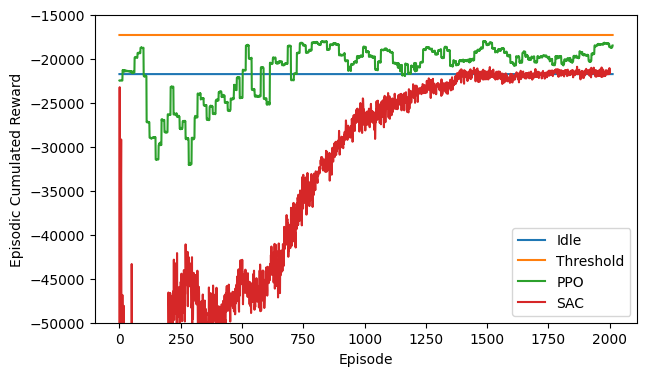

In [9]:
cmap = plt.get_cmap('hsv')
colors = cmap(np.linspace(0, 0.9, len(results_initial)))
plt.figure(figsize=(7,4))
ax = plt.gca()

labels = ["Idle", "Threshold", "PPO", "SAC"]

for i, run in enumerate(results_initial.keys()):
    if len(results_initial[run]) > 1:
        data = np.array(results_initial[run])
    else:
        data = results_initial[run] * np.max([len(eps) for eps in results_initial.values()])
    ax.plot(data, label=labels[i])#, color=colors[i])

ax.legend()
ax.set_ylabel("Episodic Cumulated Reward")
ax.set_xlabel("Episode")
ax.set_ylim([-50000, -15000])
#ax.grid()

plt.show()

In [10]:
results_stacked= {
    "idle": results["idle"],
    "single-threshold": results["single-threshold"],
    "ppo": results["ppo_stacked"],
    "sac": results["sac_stacked"],
}

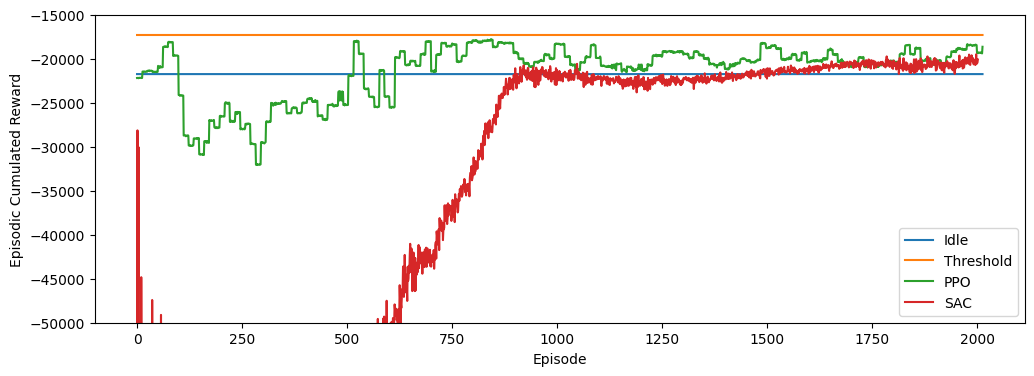

In [37]:
cmap = plt.get_cmap('hsv')
colors = cmap(np.linspace(0, 0.9, len(results_stacked)))
plt.figure(figsize=(12,4))
ax = plt.gca()

labels = ["Idle", "Threshold", "PPO", "SAC"]

for i, run in enumerate(results_stacked.keys()):
    if len(results_stacked[run]) > 1:
        data = np.array(results_stacked[run])
    else:
        data = results_stacked[run] * np.max([len(eps) for eps in results_stacked.values()])
    ax.plot(data, label=labels[i])#, color=colors[i])

ax.legend()
ax.set_ylabel("Episodic Cumulated Reward")
ax.set_xlabel("Episode")
ax.set_ylim([-50000, -15000])
#ax.grid()

plt.show()

In [13]:
results_ess = load_results("./logs/ess")
results_fdr = load_results("./logs/fdr")
results_tcl = load_results("./logs/tcl")

In [16]:
results_ess_scalar = {
    "idle": results_ess["idle_scalar_fdr"],
    "single-threshold": results_ess["single-threshold_scalar_fdr"],
    "ppo": results_ess["ppo_scalar_fdr"],
    "sac": results_ess["sac_scalar_fdr"],
}
results_fdr_scalar = {
    "idle": results_fdr["idle_scalar_fdr"],
    "single-threshold": results_fdr["single-threshold_scalar_fdr"],
    "ppo": results_fdr["ppo_scalar_fdr"],
    "sac": results_fdr["sac_scalar_fdr"],
}
results_tcl_scalar = {
    "idle": results_tcl["idle_scalar_fdr"],
    "single-threshold": results_tcl["single-threshold_scalar_fdr"],
    "ppo": results_tcl["ppo_scalar_fdr"],
    "sac": results_tcl["sac_scalar_fdr"],
}

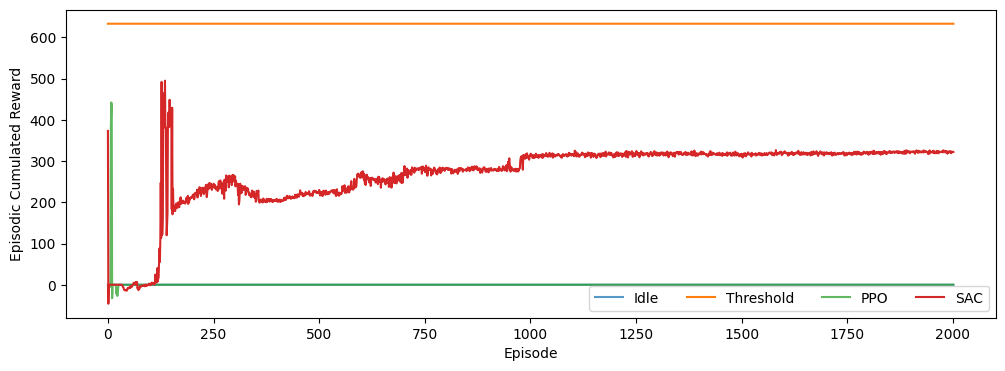

In [36]:
cmap = plt.get_cmap('hsv')
colors = cmap(np.linspace(0, 0.9, len(results_ess_scalar)))
plt.figure(figsize=(12,4))
ax = plt.gca()

labels = ["Idle", "Threshold", "PPO", "SAC"]

for i, run in enumerate(results_ess_scalar.keys()):
    if len(results_ess_scalar[run]) > 1:
        data = np.array(results_ess_scalar[run])
    else:
        data = results_ess_scalar[run] * np.max([len(eps) for eps in results_ess_scalar.values()])
    if labels[i] == "PPO" or labels[i] == "Idle":
        ax.plot(data, label=labels[i], alpha=0.75)#, color=colors[i])
    else:
        ax.plot(data, label=labels[i])#, color=colors[i])

ax.legend(ncol=4)
ax.set_ylabel("Episodic Cumulated Reward")
ax.set_xlabel("Episode")
#ax.set_ylim([-50000, -15000])
#ax.grid()

plt.show()

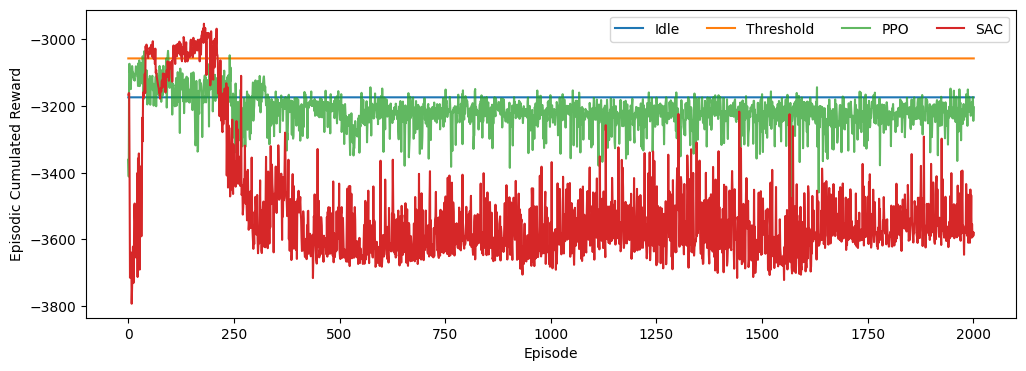

In [32]:
cmap = plt.get_cmap('hsv')
colors = cmap(np.linspace(0, 0.9, len(results_fdr_scalar)))
plt.figure(figsize=(12,4))
ax = plt.gca()

labels = ["Idle", "Threshold", "PPO", "SAC"]

for i, run in enumerate(results_fdr_scalar.keys()):
    if len(results_fdr_scalar[run]) > 1:
        data = np.array(results_fdr_scalar[run])
    else:
        data = results_fdr_scalar[run] * np.max([len(eps) for eps in results_fdr_scalar.values()])
    if labels[i] == "PPO":
        ax.plot(data, label=labels[i], alpha=0.75)#, color=colors[i])
    else:
        ax.plot(data, label=labels[i])#, color=colors[i])

ax.legend(ncol=4)
ax.set_ylabel("Episodic Cumulated Reward")
ax.set_xlabel("Episode")
#ax.set_ylim([-50000, -15000])
#ax.grid()

plt.show()

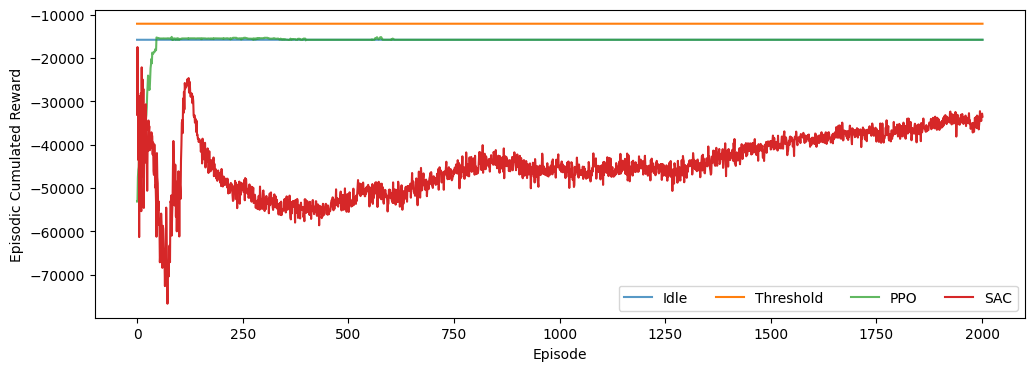

In [33]:
cmap = plt.get_cmap('hsv')
colors = cmap(np.linspace(0, 0.9, len(results_tcl_scalar)))
plt.figure(figsize=(12,4))
ax = plt.gca()

labels = ["Idle", "Threshold", "PPO", "SAC"]

for i, run in enumerate(results_tcl_scalar.keys()):
    if len(results_tcl_scalar[run]) > 1:
        data = np.array(results_tcl_scalar[run])
    else:
        data = results_tcl_scalar[run] * np.max([len(eps) for eps in results_tcl_scalar.values()])
    if labels[i] == "PPO" or labels[i] == "Idle":
        ax.plot(data, label=labels[i], alpha=0.75)#, color=colors[i])
    else:
        ax.plot(data, label=labels[i])#, color=colors[i])

ax.legend(ncol=4)
ax.set_ylabel("Episodic Cumulated Reward")
ax.set_xlabel("Episode")
#ax.set_ylim([-50000, -15000])
#ax.grid()

plt.show()

In [38]:
results_terminal = {
    "idle": results["idle"],
    "single-threshold": results["single-threshold"],
    "ppo": results["ppo_sparse"],
    "sac": results["sac_sparse"],
}

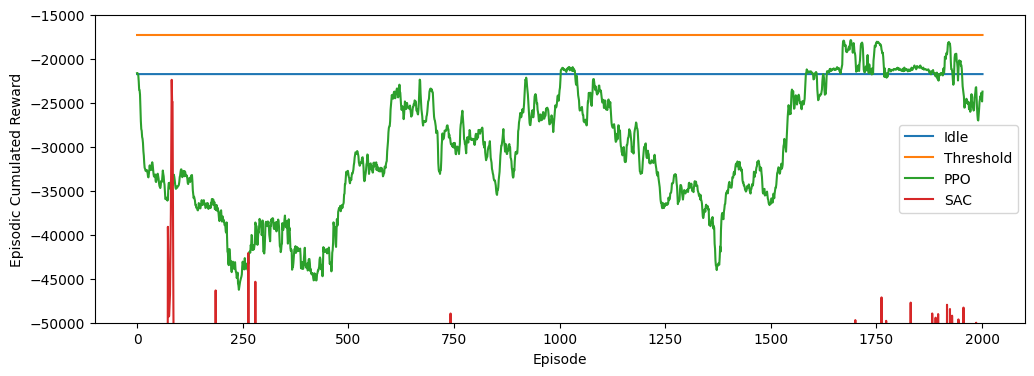

In [39]:
cmap = plt.get_cmap('hsv')
colors = cmap(np.linspace(0, 0.9, len(results_terminal)))
plt.figure(figsize=(12,4))
ax = plt.gca()

labels = ["Idle", "Threshold", "PPO", "SAC"]

for i, run in enumerate(results_terminal.keys()):
    if len(results_terminal[run]) > 1:
        data = np.array(results_terminal[run])
    else:
        data = results_terminal[run] * np.max([len(eps) for eps in results_terminal.values()])
    ax.plot(data, label=labels[i])#, color=colors[i])

ax.legend()
ax.set_ylabel("Episodic Cumulated Reward")
ax.set_xlabel("Episode")
ax.set_ylim([-50000, -15000])
#ax.grid()

plt.show()

# Table

In [58]:
ess_data = load_data("./logs/ess")
fdr_data = load_data("./logs/fdr")
tcl_data = load_data("./logs/tcl")
hourly_data = load_data("./logs/hourly")

In [59]:
ess_data = {
    "sac_scalar_fdr": ess_data["sac_scalar_fdr"][1:],
    "ppo_scalar_fdr": ess_data["ppo_scalar_fdr"],
    "idle_scalar_fdr": ess_data["idle_scalar_fdr"],
    "single-threshold_scalar_fdr": ess_data["single-threshold_scalar_fdr"]
}
fdr_data = {
    "sac_scalar_fdr": fdr_data["sac_scalar_fdr"],
    "ppo_scalar_fdr": fdr_data["ppo_scalar_fdr"],
    "idle_scalar_fdr": fdr_data["idle_scalar_fdr"],
    "single-threshold_scalar_fdr": fdr_data["single-threshold_scalar_fdr"]
}
tcl_data = {
    "sac_scalar_fdr": tcl_data["sac_scalar_fdr"],
    "ppo_scalar_fdr": tcl_data["ppo_scalar_fdr"],
    "idle_scalar_fdr": tcl_data["idle_scalar_fdr"],
    "single-threshold_scalar_fdr": tcl_data["single-threshold_scalar_fdr"]
}
hourly_data = {
    "sac_sparse": hourly_data["sac_sparse"],
    "ppo_sparse": hourly_data["ppo_sparse"],
}

In [63]:
ess_data2 = {
    "sac_scalar_fdr": ess_data["sac_scalar_fdr"][1:],
    "ppo_scalar_fdr": ess_data["ppo_scalar_fdr"][10:],
    "idle_scalar_fdr": ess_data["idle_scalar_fdr"],
    "single-threshold_scalar_fdr": ess_data["single-threshold_scalar_fdr"]
}
fdr_data = {
    "sac_scalar_fdr": fdr_data["sac_scalar_fdr"],
    "ppo_scalar_fdr": fdr_data["ppo_scalar_fdr"],
    "idle_scalar_fdr": fdr_data["idle_scalar_fdr"],
    "single-threshold_scalar_fdr": fdr_data["single-threshold_scalar_fdr"]
}
tcl_data = {
    "sac_scalar_fdr": tcl_data["sac_scalar_fdr"],
    "ppo_scalar_fdr": tcl_data["ppo_scalar_fdr"],
    "idle_scalar_fdr": tcl_data["idle_scalar_fdr"],
    "single-threshold_scalar_fdr": tcl_data["single-threshold_scalar_fdr"]
}
hourly_data = {
    "sac_sparse": hourly_data["sac_sparse"],
    "ppo_sparse": hourly_data["ppo_sparse"],
}

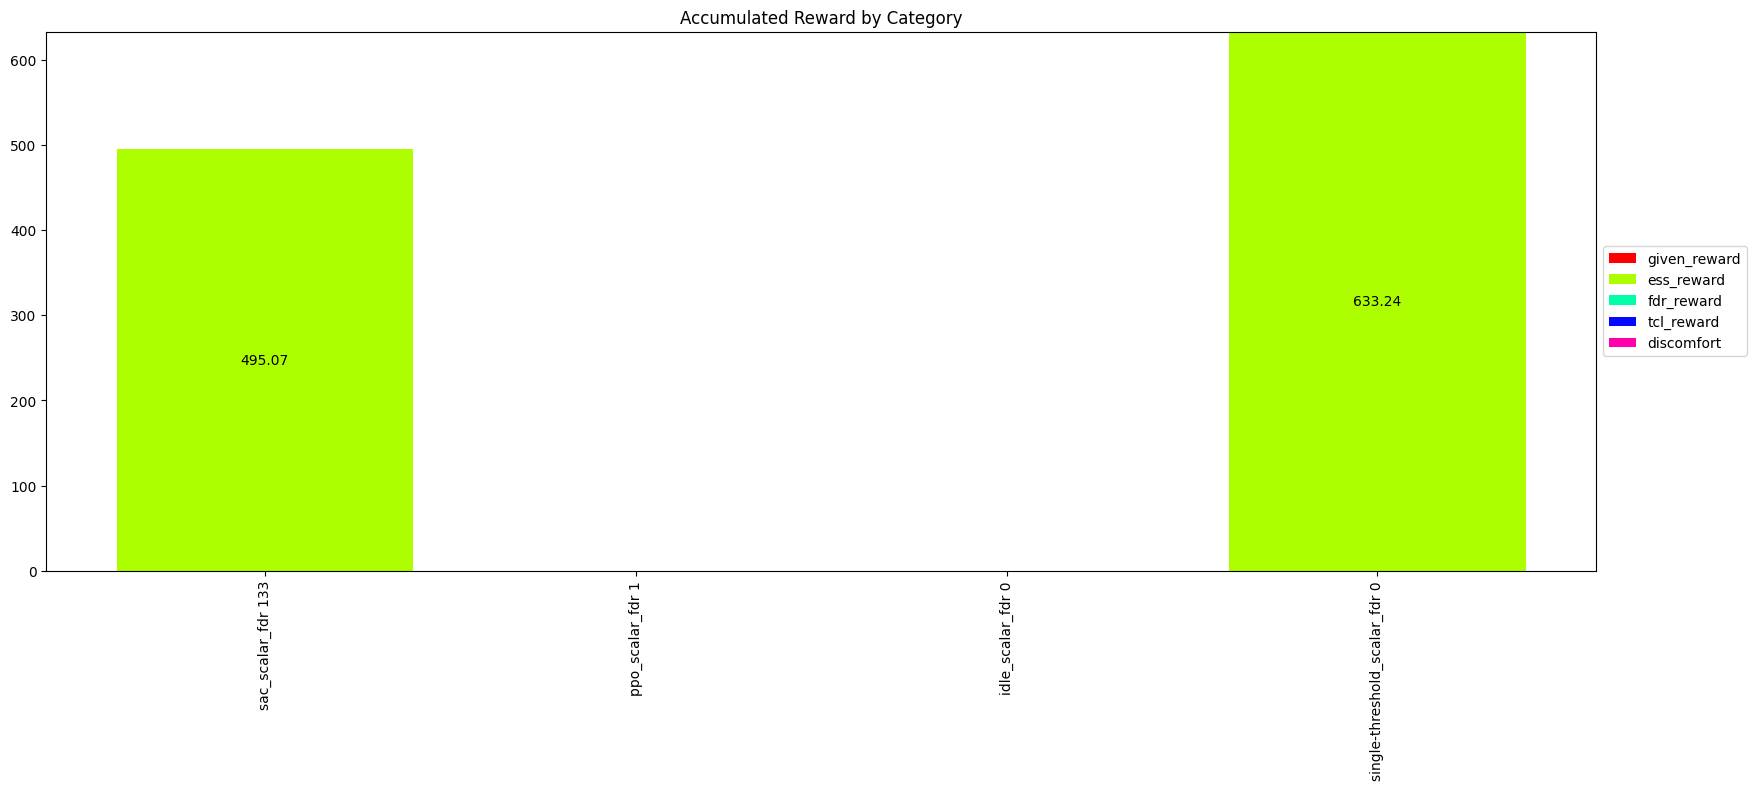

In [64]:
best_rewards_by_category(ess_data2)

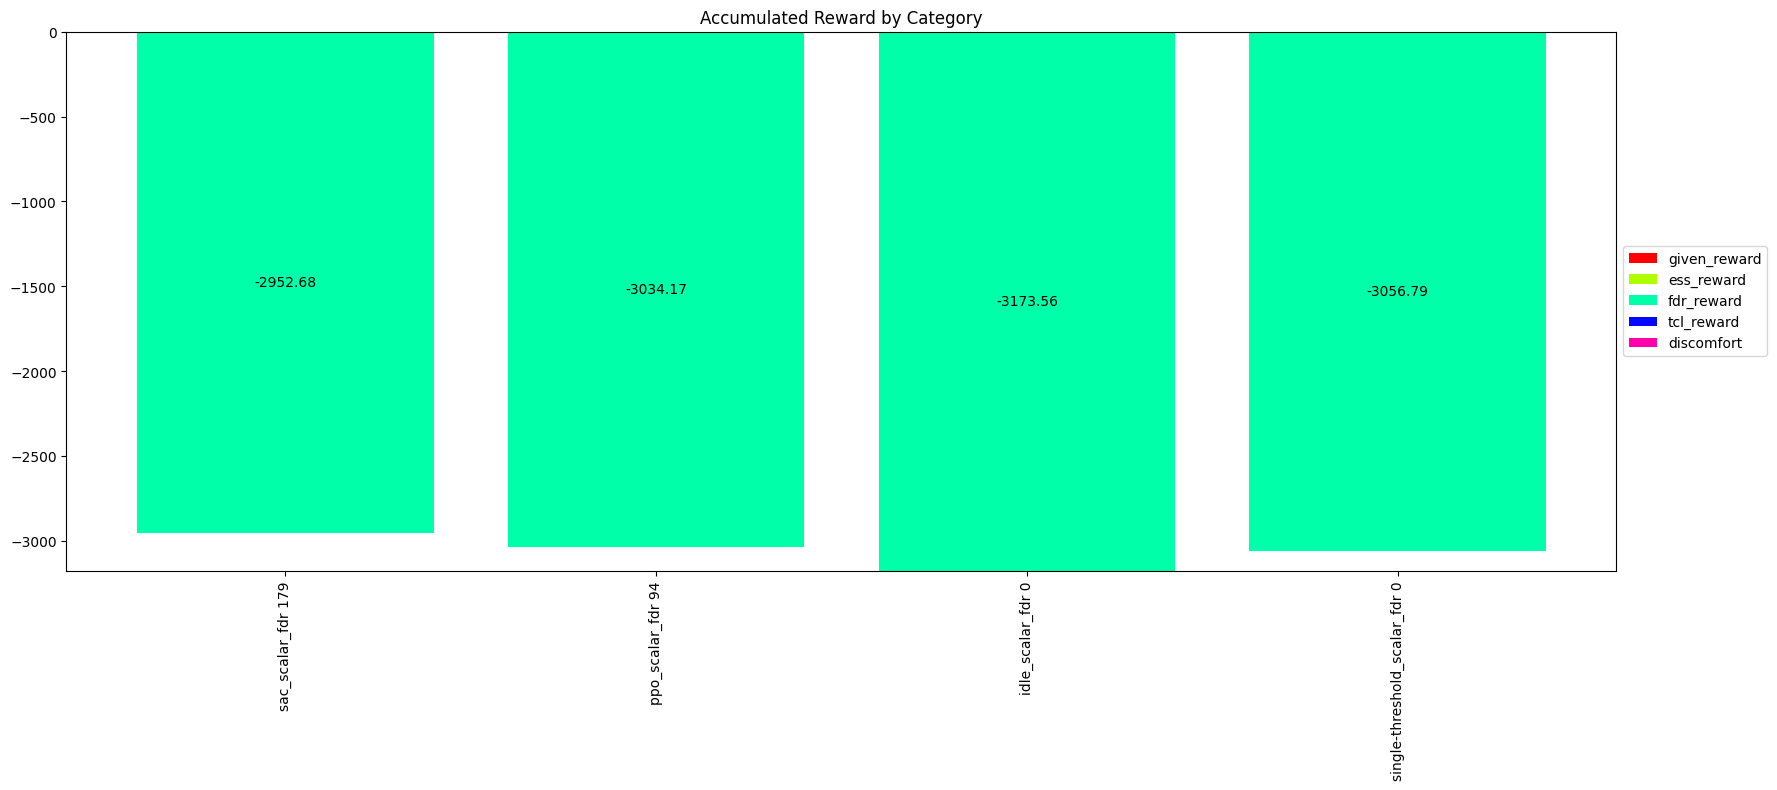

In [65]:
best_rewards_by_category(fdr_data)

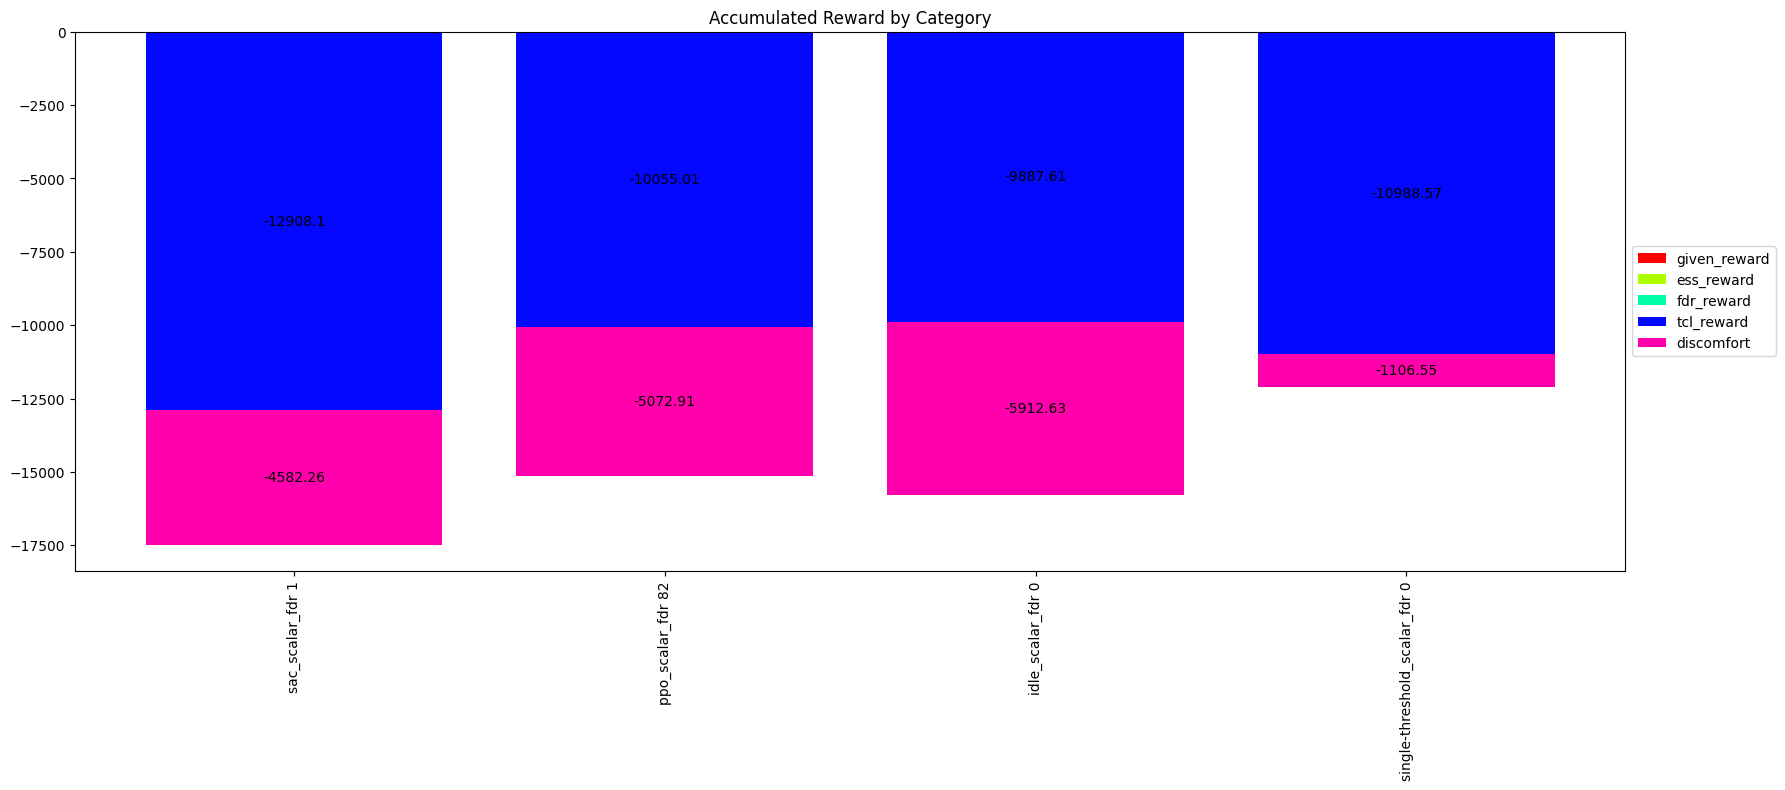

In [66]:
best_rewards_by_category(tcl_data)

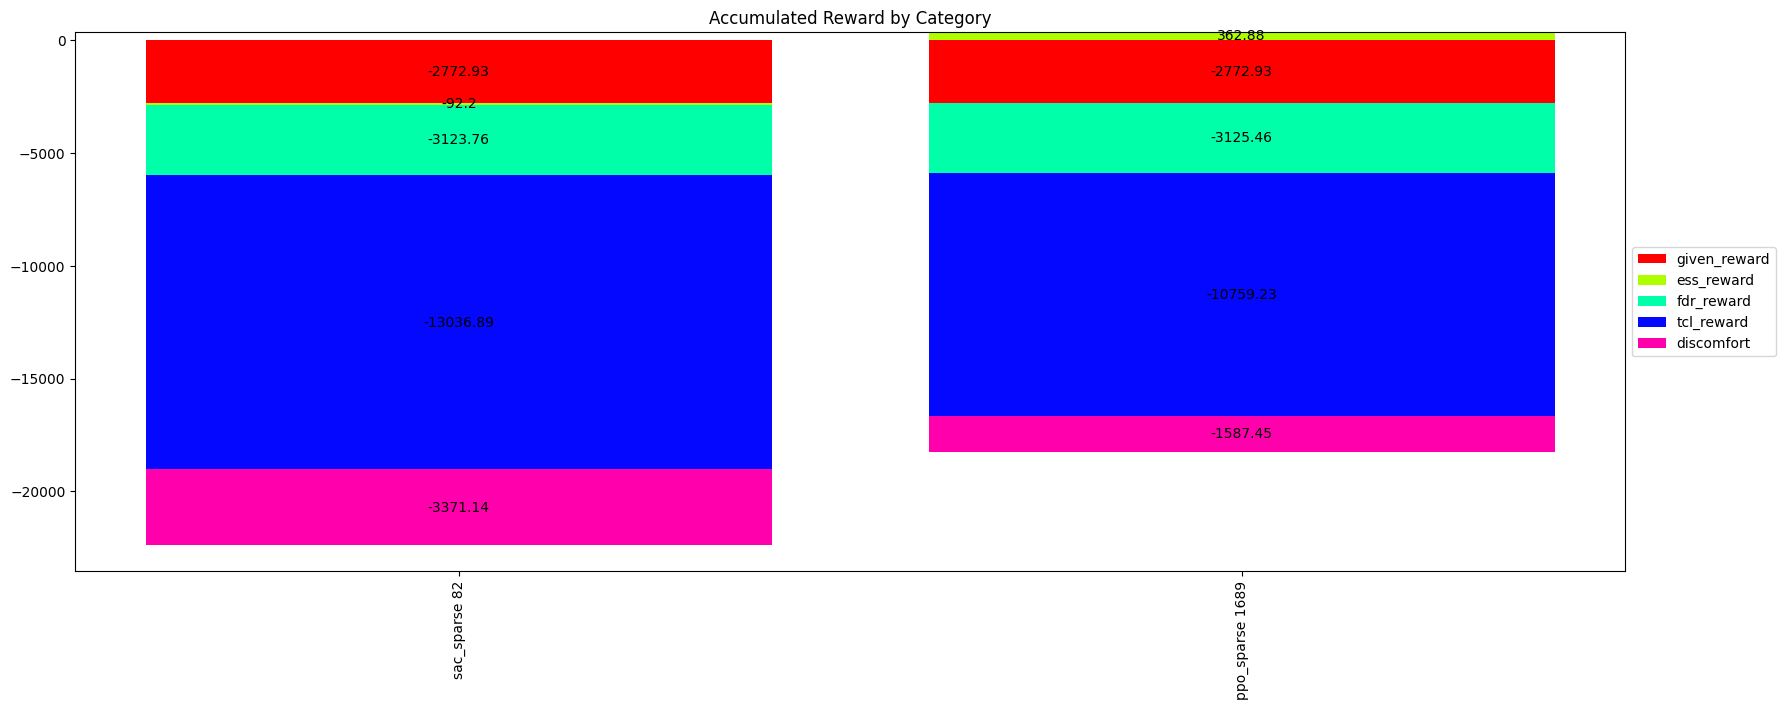

In [57]:
best_rewards_by_category(hourly_data)